In [3]:
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# filter for DA
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df.head()

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


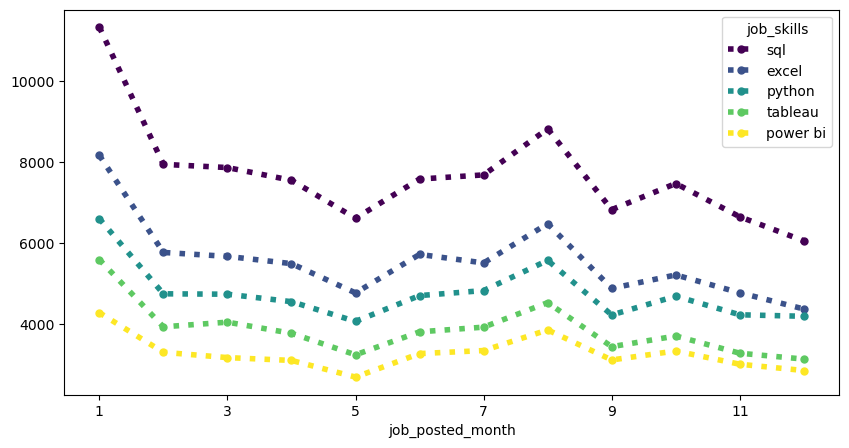

In [4]:
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index = 'job_posted_month', columns = 'job_skills', aggfunc = 'size', fill_value = 0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot
df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 4,
    linestyle = ':', # options : - ,-- ,-. ,:
    colormap = 'viridis', # options - viridis, plasma, inferno, magma, cividis
    marker = 'o', # options - o, x, +, *, s, ',', '.', 1 2 3 4 
    markersize = 5,
    figsize = (10,5)
    )
plt.show()

In [ ]:
#matplotlib.org/cheatsheets/

# Histogram good for distribution of values 
#df_DA_US = df[(df['job_title_short']== 'Data Analyst')& (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'number of jobs')

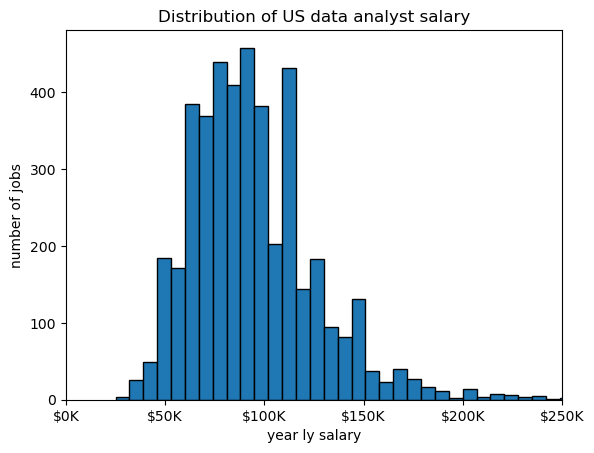

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 50, edgecolor = 'black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title("Distribution of US data analyst salary")
plt.xlabel("year ly salary")
plt.ylabel('number of jobs')

In [11]:
# box plots - compare values - build on hist - distribution of values 
df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

<Axes: >

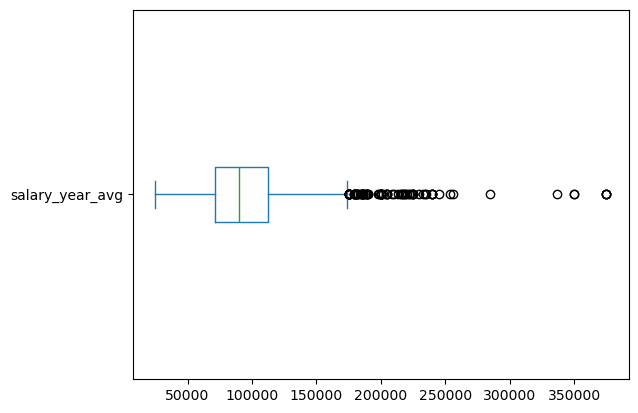

In [12]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

/var/folders/b2/8wwx1jtd3kjg08tphdztb4zh0000gn/T/ipykernel_53965/1319953301.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


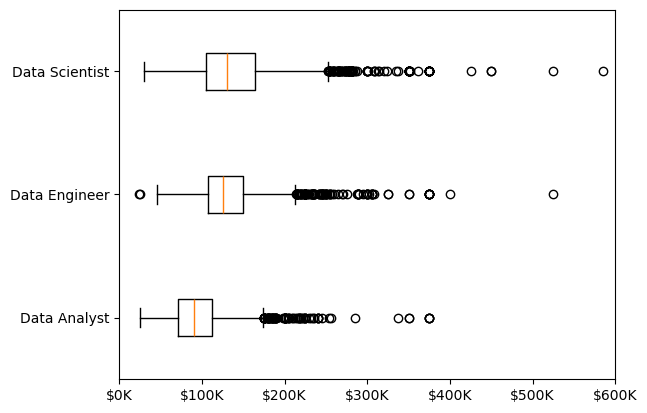

In [19]:
# box in middle is median value(Line in it ) - left is outlier (min) and right is outlier (max)

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))& (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = 'salary_year_avg')

job_list = [df_US[df_US['job_title_short']== x]['salary_year_avg'] for x in job_titles]
plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.xlim(0,600000)
plt.show()